# Larry Gu

## Research question/interests
According to NOAA's National Weather Service's [article](https://w1.weather.gov/glossary/index.php?word=dew+point)

- Dew Point:
(Abbrev. DWPT) - A measure of atmospheric moisture. It is the temperature to which air must be cooled in order to reach saturation (assuming air pressure and moisture content are constant). A higher dew point indicates more moisture present in the air. It is sometimes referred to as Dew Point Temperature, and sometimes written as one word (Dewpoint).
- Dew Point Depression:
The difference in degrees between the air temperature and the dew point.


Concerned for weather changes, I picked a data set which records weather statistics from Estes Park, Colorado over ten years.I will attempt to spot the existence and regularity of worrying climate change by studying dew point.

1. Is there drastic changes of dewpoint over years? If there is, in which month is that occuring and why?
2. How does dewpoint depression change over years? If it is increasing, what other changes in climate factors does it correspond to?

# Milestone 3

## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as pf1

In [ ]:
path = '../data/raw/climate_data.csv'
df = pd.read_csv(path)

First we load the dataset from the folder.

In [ ]:
print(df.shape)
df.head()

(3902, 23)


,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


The dataset is 3902 rows by 23 columns. I notice that Date1 is purely redundant. I will remove this in the future. 

As columns in this dataframe have very long names, and many of them have spaces in between. It may cause trouble in EDA. So, I will update the column names data before I proceed.

In [ ]:
df_new = pf1.update_column(path)
df_new.head()

,Date,avg_tem,avg_hum,avg_dew,avg_bar,avg_win,avg_gus,avg_dir,rfm,rfy,...,max_hum,min_hum,max_pre,min_pre,max_win,max_gus,max_hea,Date1,Month,dif_p
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


Now the column names are all updated according to this:

      "Average temperature (°F)":"avg_tem",
      "Average humidity (%)":"avg_hum",
      "Average dewpoint (°F)":"avg_dew",
      "Average barometer (in)":"avg_bar",
      "Average windspeed (mph)":"avg_win",
      "Average gustspeed (mph)":"avg_gus",
      "Average direction (°deg)":"avg_dir",
      "Rainfall for month (in)":"rfm",
      "Rainfall for year (in)":"rfy",
      "Maximum rain per minute":"max_rai",
      "Maximum temperature (°F)":"max_tem",
      "Minimum temperature (°F)":"min_tem",
      "Maximum humidity (%)":"max_hum",
      "Minimum humidity (%)":"min_hum",
      "Maximum pressure":"max_pre",
      "Minimum pressure":"min_pre",
      "Maximum windspeed (mph)":"max_win",
      "Maximum gust speed (mph)":"max_gus",
      "Maximum heat index (°F)":"max_hea",
      "diff_pressure":"dif_p"
It will make code writing much easier. 

Before I invesigate how dewpoints change over years. I want to uncover dewpoint changing patterns over month.

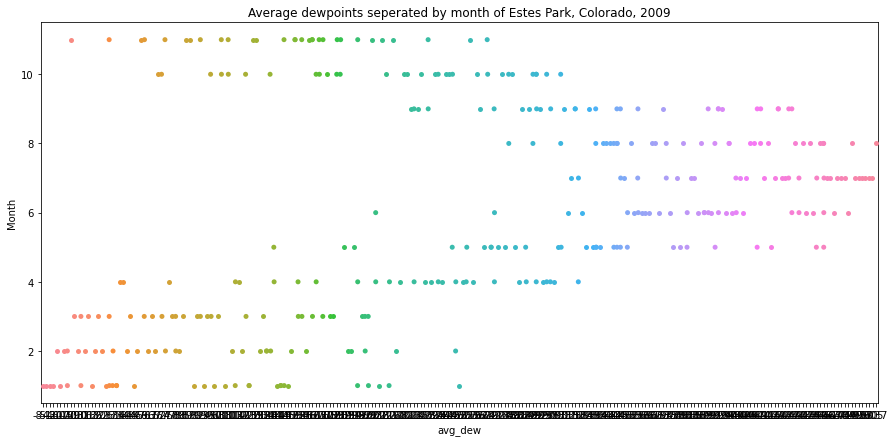

In [ ]:
df11=df_new.loc[lambda x: x.Date.str.contains("2009")]

plt.figure(figsize=(15,7))
sns.stripplot(data=df11, x="avg_dew", y="Month").set(title='Average dewpoints seperated by month of Estes Park, Colorado, 2009')  
# ax.tick_params(bottom=False)  # remove the ticks
plt.show()

<AxesSubplot:xlabel='avg_dew'>

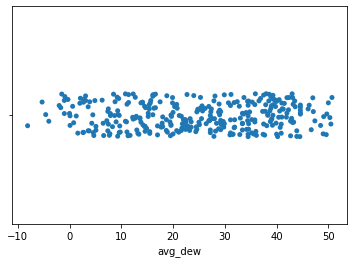

In [ ]:
sns.stripplot(data=df11,x="avg_dew")

Note that this data is from Estes Park, Colorado. I can see that dewpoints are higher in summer (June to August) and lower in winter (December to Feburary). I would like to investigate on how these value changes over different years. But now I will start investigating on factors that are related to average dewpoints.

In [ ]:
describe_df = df_new.describe().T.sort_values(by=['std'])[['mean','std','min','max']]
print(describe_df)

               mean        std     min      max
max_rai    0.000000   0.000000   0.000    0.000
avg_bar   29.881420   0.250395  28.200   31.000
max_pre   30.045451   0.258140  29.338   31.204
dif_p      0.343829   0.407499   0.000   16.602
min_pre   29.701622   0.451691  13.266   30.855
rfm        0.451105   0.603462   0.000    4.480
Month      6.395695   3.430231   1.000   12.000
avg_win    5.758893   4.022485   0.000   26.400
rfy        5.486171   4.534444   0.000   16.410
max_win   19.840748  12.235410   0.000  181.700
avg_gus   10.011968  14.117446   0.000  240.400
min_tem   31.227524  14.124424 -27.700   65.700
avg_dew   23.127037  14.634088 -22.200   55.100
avg_tem   44.670733  15.326793 -12.100   76.300
min_hum   26.016914  15.623870   0.000   90.000
avg_hum   48.878011  17.438153   9.000   94.000
max_tem   57.561661  17.755874  -6.100   92.700
max_hea   58.086315  17.953453  -6.100   88.400
max_hum   73.673757  20.380611   1.000  100.000
max_gus   33.974910  38.632424   0.000  

I can see that the std of columns regarding gustspeed, humidity, and temperature are very close to average dewpoint. 
That suggests they may have similar levels of flucuations.
I want further investigate on their relationship to avgerage dewpoint.

Also maximum rain per minute is always 0, so for the future invesigation regarding this dataset, I will probably leave the rain data out in future data analysis.

<AxesSubplot:ylabel='Density'>

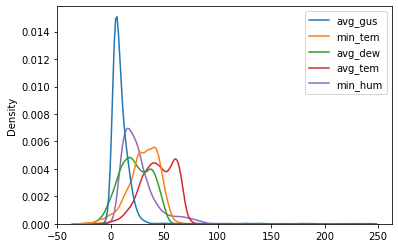

In [ ]:
# sns.displot(data=df_new, x="avg_dew")
sns.kdeplot(data=df_new[["avg_gus","min_tem","avg_dew","avg_tem","min_hum"]])

From the five features that have std closet to average dewpoint. It is hard to say that average gustspeed is relatable to average dewpoint. I will focus on humidity and temperature from now on.

Let's give average temperature a closer look first.

<AxesSubplot:xlabel='avg_dew', ylabel='avg_tem'>

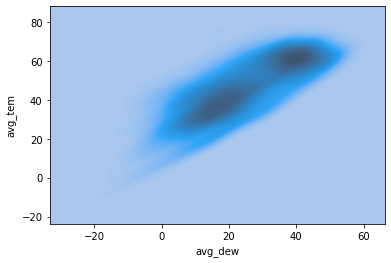

In [ ]:
sns.kdeplot(data=df_new, x="avg_dew", y="avg_tem",fill=True,thresh=0, levels=100 )

Now lets give average humidity a try.

<AxesSubplot:xlabel='avg_dew', ylabel='avg_hum'>

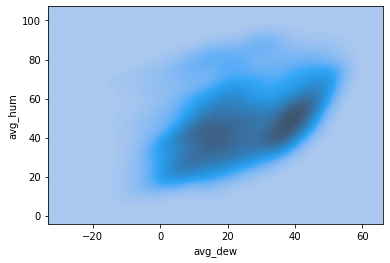

In [ ]:
sns.kdeplot(data=df_new, x="avg_dew", y="avg_hum",fill=True,thresh=0, levels=100 )

The shape of both graphs are rather rounded and close to the center of the graphs.
Suggesting that the all three distributions are close to normal distribution.
It is interesting though, that there are two cluters on both graph (where the color of the area is darkest).
It might suggest that during winter and summer, the values are relatively close to each other. But during intermediate periods, they both changes in the same direction.

## Data Analysis Pipeline

First, as stated before, I will load the data with updated columns

In [ ]:
df_2 = pf1.update_column(path)
print(df_2.head())

         Date  avg_tem  avg_hum  avg_dew  avg_bar  avg_win  avg_gus  avg_dir  \
0  2009-01-01     37.8     35.0     12.7     29.7     26.4     36.8    274.0   
1  2009-01-02     43.2     32.0     14.7     29.5     12.8     18.0    240.0   
2  2009-01-03     25.7     60.0     12.7     29.7      8.3     12.2    290.0   
3  2009-01-04      9.3     67.0      0.1     30.4      2.9      4.5     47.0   
4  2009-01-05     23.5     30.0     -5.3     29.9     16.7     23.1    265.0   

   rfm  rfy  ...  max_hum  min_hum  max_pre  min_pre  max_win  max_gus  \
0  0.0  0.0  ...      4.0     27.0   29.762   29.596     41.4     59.0   
1  0.0  0.0  ...      4.0     16.0   29.669   29.268     35.7     51.0   
2  0.0  0.0  ...      8.0     35.0   30.232   29.260     25.3     38.0   
3  0.0  0.0  ...      7.0     35.0   30.566   30.227     12.7     20.0   
4  0.0  0.0  ...      5.0     13.0   30.233   29.568     38.0     53.0   

   max_hea       Date1  Month  dif_p  
0     40.0  2009-01-01      1  0.16

As planned, I will first remove Date1 as it is purely redundant. And remove rfm and rfy as the place does not rain. (And other data that I am not using.)

In [ ]:
df_2 = df_2.drop(['rfm','rfy', 'Date1','avg_bar','avg_win','avg_gus','avg_dir','max_rai','max_pre','min_pre','max_win','dif_p','max_gus'], axis=1).dropna(axis=0)
df_2.head()

,Date,avg_tem,avg_hum,avg_dew,max_tem,min_tem,max_hum,min_hum,max_hea,Month
0,2009-01-01,37.8,35.0,12.7,40.0,34.0,4.0,27.0,40.0,1
1,2009-01-02,43.2,32.0,14.7,52.0,37.0,4.0,16.0,52.0,1
2,2009-01-03,25.7,60.0,12.7,41.0,6.0,8.0,35.0,41.0,1
3,2009-01-04,9.3,67.0,0.1,19.0,-0.0,7.0,35.0,32.0,1
4,2009-01-05,23.5,30.0,-5.3,30.0,15.0,5.0,13.0,32.0,1


Now, to analyze avgerage dewpoint according to dates easier, I want to update the date to datetime object

In [ ]:
df_2['Date'] = df.apply(lambda x: pd.to_datetime(x.Date).date(), axis=1)
print('The type of date is now',type(df_2['Date'][0]))

The type of date is now <class 'datetime.date'>


You can now see that the Data is updated, and it is now with all I need.

## Method Chaining

Start by removing all the redundant variables and load the dataset again

In [ ]:
reset -f

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as pf1

In [ ]:
path = '../data/raw/climate_data.csv'

In [ ]:
df_3 = pf1.load_and_process(path)
df_3.head()

,Date,avg_tem,avg_hum,avg_dew,max_tem,min_tem,max_hum,min_hum,max_hea,Month
0,2009-01-01,37.8,35.0,12.7,40.0,34.0,4.0,27.0,40.0,1
1,2009-01-02,43.2,32.0,14.7,52.0,37.0,4.0,16.0,52.0,1
2,2009-01-03,25.7,60.0,12.7,41.0,6.0,8.0,35.0,41.0,1
3,2009-01-04,9.3,67.0,0.1,19.0,-0.0,7.0,35.0,32.0,1
4,2009-01-05,23.5,30.0,-5.3,30.0,15.0,5.0,13.0,32.0,1


In [ ]:
type(df_3["Date"][0])

datetime.date

All done! The data set is ready to go.